# Описание проекта

<div style="border: 1px solid; padding: 20px">
<i>Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.<i>
</div>

# Описание данных

**Данные для первой части**

Файл `/datasets/hypothesis.csv`
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
***
**Данные для второй части**

Файл `/datasets/orders.csv`
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Часть 1. Приоритизация гипотез.

In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
pth1 = '/datasets/hypothesis.csv'

if os.path.exists(pth1):
    hypothesis = pd.read_csv(pth1)
else:
    try:
        hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    except:
        print('Что-то пошло не так...')

pd.options.display.max_colwidth = 110
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Названия колонок датафрейма начинаются с заглавных букв, что не соответсвует стандарту оформления, однако, данный факт никак не повлияет на дальнейшую работу. По этой причине не будем переименовывать столбцы.

### Примените фреймворк `ICE` для приоритизации гипотез

In [4]:
hypothesis['ICE'] = (hypothesis['Confidence'] * hypothesis['Impact'] / hypothesis['Efforts']).round(1)
ICE = hypothesis[['Hypothesis', 'ICE']]\
                                    .sort_values(by='ICE', ascending=False)\
                                    .reset_index()\
                                    .rename(columns={'index':'Hypothesis №'})
ICE['Hypothesis №'] = ICE['Hypothesis №'] + 1
display(ICE)

,Hypothesis №,Hypothesis,ICE
0,9,"Запустить акцию, дающую скидку на товар в день рождения",16.2
1,1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
2,8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
3,7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
4,3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
5,2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
6,6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
7,4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
8,5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


### Примените фреймворк `RICE` для приоритизации гипотез

In [5]:
hypothesis['RICE'] = (hypothesis['Confidence'] * hypothesis['Impact'] * hypothesis['Reach']/ hypothesis['Efforts']).round(1)
RICE = hypothesis[['Hypothesis', 'RICE']]\
                                    .sort_values(by='RICE', ascending=False)\
                                    .reset_index()\
                                    .rename(columns={'index':'Hypothesis №'})
RICE['Hypothesis №'] = RICE['Hypothesis №'] + 1
display(RICE)

,Hypothesis №,Hypothesis,RICE
0,8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
1,3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
2,1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
3,7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
4,9,"Запустить акцию, дающую скидку на товар в день рождения",16.2
5,4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
6,2,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
7,6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
8,5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">
    
📜 Итог:
    
+ Наиболее перспективные гипотезы по ICE: 9, 1 и 8.    
+ Наиболее перспективные гипотезы по RICE: 8, 3, 1 и 7.
+ При учете параметра `Reach` гипотезы 3 ("Добавить блоки рекомендаций товаров") и 7 ("Показать баннеры на главной странице") приобретают больший приоритет, так как они затрагивают множество пользователей. В свою очередь, гипотеза 9 ("Запустить скидочную акцию") перестает быть на столько перспективной.
+ Гипотезы 8 ("Добавить форму подписки") и 1 ("Добавить каналы привлечения трафика") являются перспективными как согласно методу ICE, так и согласно методу RICE.
    
</div>

## Часть 2. Анализ A/B-теста

In [6]:
pth2 = '/datasets/orders.csv'
pth3 = '/datasets/visitors.csv'

if os.path.exists(pth2) and os.path.exists(pth3):
    orders = pd.read_csv(pth2)
    visitors = pd.read_csv(pth3)
else:
    try:
        orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
        visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    except:
        print('Что-то пошло не так...')
        
display(orders.head(5), visitors.head(5))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
# приведем столбцы date в таблицах orders и visitors к формату datetime64 
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
# проверим наличие явнях дубликатов в данных
print('Общее количество дубликатов в таблице orders: {}'.format(orders.duplicated().sum()))
print('Общее количество дубликатов в таблице visitors: {}'.format(visitors.duplicated().sum()))

Общее количество дубликатов в таблице orders: 0
Общее количество дубликатов в таблице visitors: 0


In [11]:
# проверим, не попали ли одни и те же пользователи в разные группы А/В-теста 
IdByGroup = orders[['visitorId', 'group']]\
                                    .groupby('visitorId', as_index=False)\
                                    .agg({'group': 'nunique'})
IdByGroup = IdByGroup[IdByGroup['group'] == 2].reset_index(drop=True)
visitorId_list = IdByGroup['visitorId'].tolist()
visitorIdToFix = orders.query('visitorId in @visitorId_list')\
                        .groupby(['visitorId', 'group'])\
                        .agg({'date': 'count'})\
                        .rename(columns = {'date': 'orders'})
display(visitorIdToFix)

orders
visitorId  group        
8300375    A           1
           B           1
199603092  A           4
           B           1
232979603  A           1
...                  ...
4186807279 B           2
4256040402 A           7
           B           4
4266935830 A           1
           B           1

[116 rows x 1 columns]

In [12]:
print('Пользователей в ходе проведения А/В-теста попали в обе группы: {}'.format(IdByGroup['visitorId'].nunique()))

Пользователей в ходе проведения А/В-теста попали в обе группы: 58


В ходе проведения эксперимента на группы разделялись не пользователи оп visitorId, а пользовательские сессии, по этой причине одни и те же пользователи могли попасть в различные группы при тестировании. В идеальном случа, таких пользователей пришлось бы исключить из анализа, но так как мы не знаем желаемых размеров групп для проведения А/В-теста, то в данном случае оставим всех пользователей.

In [13]:
print('В А/В-тесте присутствуют следующие группы: {}'.format(orders['group'].unique()))

В А/В-тесте присутствуют следующие группы: ['B' 'A']


In [14]:
print('В группу А попало: {} пользователя'.format(orders[orders['group'] == "A"]['visitorId'].nunique()))
print('В группу В попало: {} пользователей'.format(orders[orders['group'] == "B"]['visitorId'].nunique()))

В группу А попало: 503 пользователя
В группу В попало: 586 пользователей


In [15]:
print('Дата начала теста: {}'.format(orders['date'].min()))
print('Дата окончания теста: {}'.format(orders['date'].max()))

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


In [16]:
# соберем таблицы visitorsADaily и visitorsACummulative для группы "А"
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]\
                        .rename(columns ={'visitors': 'visitorsPerDateA'})

visitorsACummulative = visitorsADaily\
                            .apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                                    .agg({'date': 'max', 
                                                          'visitorsPerDateA': 'sum'}), axis=1)\
                            .rename(columns = {'visitorsPerDateA': 'visitorsCummulativeA'})

# соберем таблицы visitorsBDaily и visitorsBCummulative для группы "B"
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]\
                        .rename(columns ={'visitors': 'visitorsPerDateB'})

visitorsBCummulative = visitorsBDaily\
                            .apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
                                                    .agg({'date': 'max', 
                                                          'visitorsPerDateB': 'sum'}), axis=1)\
                            .rename(columns = {'visitorsPerDateB': 'visitorsCummulativeB'})

# соберем таблицы ordersADaily и ordersACummulative для группы "А"
ordersADaily = orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]\
                    .groupby('date', as_index=False)\
                    .agg({'transactionId': 'nunique',
                          'revenue': 'sum'})\
                    .rename(columns = {'transactionId': 'ordersPerDateA',
                                       'revenue': 'revenuePerDateA'})

ordersACummulative = ordersADaily\
                             .apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
                                                    .agg({'date': 'max', 
                                                          'ordersPerDateA': 'sum', 
                                                          'revenuePerDateA': 'sum'}), axis=1)\
                             .sort_values(by=['date'])\
                             .rename(columns = {'ordersPerDateA': 'ordersCummulativeA',
                                                'revenuePerDateA': 'revenueCummulativeA'})
                         
# соберем таблицы ordersBDaily и ordersBCummulative для группы "B"
ordersBDaily = orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]\
                    .groupby('date', as_index=False)\
                    .agg({'transactionId': 'nunique',
                          'revenue': 'sum'})\
                    .rename(columns = {'transactionId': 'ordersPerDateB',
                                       'revenue': 'revenuePerDateB'})

ordersBCummulative = ordersBDaily\
                             .apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
                                                    .agg({'date': 'max', 
                                                          'ordersPerDateB': 'sum', 
                                                          'revenuePerDateB': 'sum'}), axis=1)\
                             .sort_values(by=['date'])\
                             .rename(columns = {'ordersPerDateB': 'ordersCummulativeB',
                                                'revenuePerDateB': 'revenueCummulativeB'})

In [17]:
# соберем все данные в одну таблицу
data = ordersADaily\
            .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
            .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
            .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
            .merge(ordersBDaily, left_on='date', right_on='date', how='left')\
            .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
            .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
            .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersCummulativeA,revenueCummulativeA,visitorsPerDateA,visitorsCummulativeA,ordersPerDateB,revenuePerDateB,ordersCummulativeB,revenueCummulativeB,visitorsPerDateB,visitorsCummulativeB
0,2019-08-01,24,148579,24,148579,719,719,21,101217,21,101217,713,713
1,2019-08-02,20,93822,44,242401,619,1338,24,165531,45,266748,581,1294
2,2019-08-03,24,112473,68,354874,507,1845,16,114248,61,380996,509,1803
3,2019-08-04,16,70825,84,425699,717,2562,17,108571,78,489567,770,2573
4,2019-08-05,25,124218,109,549917,756,3318,23,92428,101,581995,707,3280


Описание данных таблицы `data`:

- `date` — дата;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
- `ordersPerDateB` — количество заказов в выбранную дату в группе B;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

### Постройте график кумулятивной выручки по группам

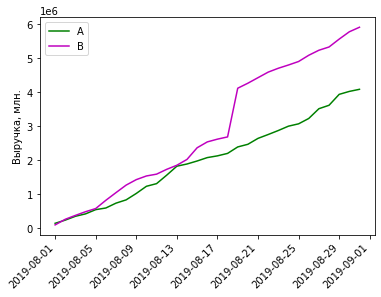

In [18]:
plt.plot(data['date'], data['revenueCummulativeA'], label='A', color='g')
plt.plot(data['date'], data['revenueCummulativeB'], label='B', color='m')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Выручка, млн.')
plt.legend();

<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">
    
📜 Итог:
    
+ Выручка обоих групп почти равномерно увеличивается в течение всего теста, однако для группы В значения стабильно выше.
+ Для графика группы В выручка в одной точке резко возростает. Скорее всего, это связано с появлением очень дорогих заказов (выбросов) в выборке.
    
</div>

### Постройте график кумулятивного среднего чека по группам

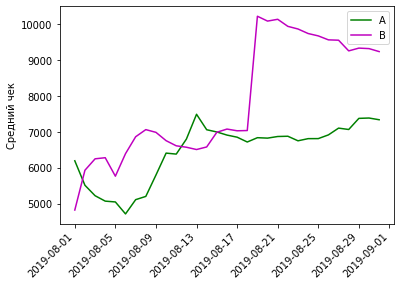

In [19]:
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A', color='g')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B', color='m')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Средний чек')
plt.legend();

<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">
    
📜 Итог:
    
+ Значения среденего чека для обоих групп растут в течение всего времени теста.
+ Средний чек для группы В стабильно больше.
+ В группу B попали крупные заказы (видим резкий всплеск на графике), что исказило результат. После резкого взлета параметра видим тренд на снижение среднего чека. Для оценки реальных значений среднего чека группы В нужно больше данных, чтобы линия на графике установилась на истинном уровне.
    
</div>

In [20]:
# посмотрим повнимательнее на выручку между 2019-08-17 и 2019-08-21
orders\
    .query('"2019-08-17" <= date <= "2019-08-21"')\
    .groupby('date')\
    .agg({'revenue': 'sum'})

,revenue
date,
2019-08-17,132016
2019-08-18,138229
2019-08-19,1619663
2019-08-20,224893
2019-08-21,337386


Как и предполагалось, необычайно дорогие заказы были сделаны 2019-08-19. Сумманрая прибыль за этот день в несколько раз выше таковой для других дней месяца. Это и является причиной резких скачков на анализируемых графиках.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A

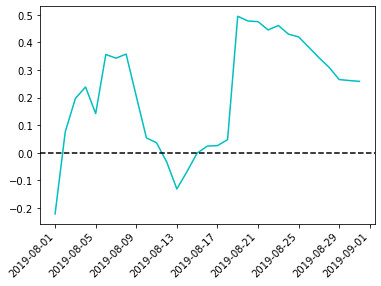

In [21]:
plt.plot(data['date'], 
         (data['revenueCummulativeB']/data['ordersCummulativeB'])/(data['revenueCummulativeA']/data['ordersCummulativeA'])-1,
         color='c')
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45, ha='right');

<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">
    
📜 Итог:
    
+ В начале эксперимента средний чек для группы В стбильно превышает таковой для группы А на 20-30%.
+ В районе 2019-08-13 средний чек для группы А был выше, однако всего в течение нескольких дней.
+ Как уже отмечалось, 2019-08-19 из-за аномально дорогих заказов значение среднего чека для группы В резко возрастает, что приводит к резкому скачку относительных значений на графике.
+ После 2019-08-19 относительный средний чек группы В постепенно снижается.
    
</div>

### Постройте график кумулятивной конверсии по группам

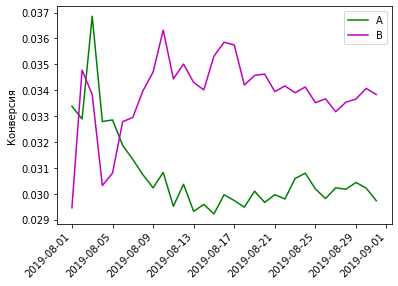

In [22]:
plt.plot(data['date'], data['ordersCummulativeA']/data['visitorsCummulativeA'], label='A', color='g')
plt.plot(data['date'], data['ordersCummulativeB']/data['visitorsCummulativeB'], label='B', color='m')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Конверсия')
plt.legend();

<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">
    
📜 Итог:
    
+ В первые дни эксперимента значения для обоих групп сильно колеблются, затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.
    
</div>

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A

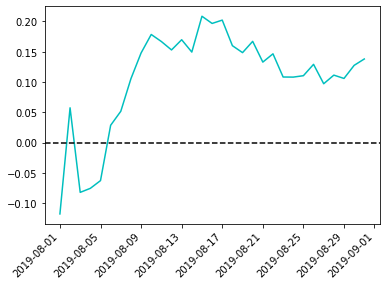

In [23]:
plt.plot(data['date'], 
         (data['ordersCummulativeB']/data['visitorsCummulativeB'])/(data['ordersCummulativeA']/data['visitorsCummulativeA'])-1,
         color='c')
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45, ha='right');

<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">
    
📜 Итог:
    
+ Конверсия группы В в течение практически всего эксперимента примерно на 10-15% выше, чем конверсия группы А.
    
</div>

### Постройте точечный график количества заказов по пользователям

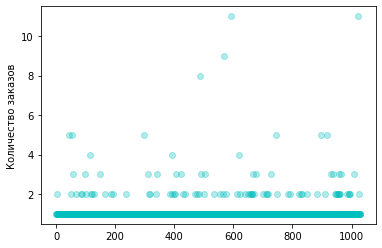

In [24]:
ordersByUsers = orders\
                    .groupby('visitorId', as_index=False)\
                    .agg({'transactionId': 'nunique'})\
                    .rename(columns={'transactionId': 'orders'})

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'], color='c', alpha=0.3)
plt.ylabel('Количество заказов');

<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">
    
📜 Итог:
    
+ Большинство пользователей совершили 1-2 заказа.
+ Есть небольшое количество пользователей, которые совершили от 3 до 5 заказов, и четыре пользователя, которые делали заказы более 8 раз.
    
</div>

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя и выберите границу для определения аномальных пользователей

In [25]:
print('95-й перцентиль количества заказов на пользователя: {}'.format(np.percentile(ordersByUsers['orders'], 95).round(1)))
print('99-й перцентиль количества заказов на пользователя: {}'.format(np.percentile(ordersByUsers['orders'], 99).round(1)))

95-й перцентиль количества заказов на пользователя: 2.0
99-й перцентиль количества заказов на пользователя: 4.0


<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">
    
📜 Итог:
    
+ 95% пользователей совершило не более 2 заказов.
+ В качестве границы для отсечения аномальных пользователей возьмем 3 заказа.
    
</div>

### Постройте точечный график стоимостей заказов

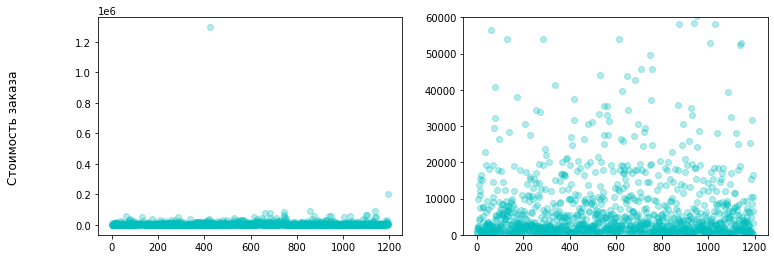

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

x_values = pd.Series(range(0,len(orders['revenue'])))
axs[0].scatter(x_values, orders['revenue'], color='c', alpha=0.3)
axs[1].scatter(x_values, orders['revenue'], color='c', alpha=0.3)
plt.ylim((0, 60000))
fig.supylabel('Стоимость заказа');

<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">
    
📜 Итог:
    
+  Есть один аномально дорогой заказ. Исходя из ранее представленных данных, можно сделать вывод, что он как раз и приходится на дату 2019-08-19.
+ Большая часть заказов не превышает 30 тыс.
    
</div>

### Посчитайте 95-й и 99-й перцентили стоимости заказов и выберите границу для определения аномальных заказов.

In [27]:
print('95-й перцентиль стоимости заказа: {}'.format(np.percentile(orders['revenue'], 95).round(1)))
print('99-й перцентиль стоимости заказа: {}'.format(np.percentile(orders['revenue'], 99).round(1)))

95-й перцентиль стоимости заказа: 28000.0
99-й перцентиль стоимости заказа: 58233.2


<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">
    
📜 Итог:
    
+ 95% пользователей совершили заказы на сумму не более 28 тыс.
+ В качестве границы для отсечения аномальных заказов возьмем 30 тыс.
    
</div>

### Посчитайте статистическую значимость различий в количестве заказов, сделанных пользователями, между группами по «сырым» данным

In [28]:
# посчитаем число заказов каждого пользователя из группы "А"
ordersByUsersA = orders[orders['group'] == 'A']\
                    .groupby('visitorId', as_index=False)\
                    .agg({'transactionId': 'nunique'})\
                    .rename(columns={'transactionId': 'orders'})

# посчитаем число заказов каждого пользователя из группы "В"
ordersByUsersB = orders[orders['group'] == 'B']\
                    .groupby('visitorId', as_index=False)\
                    .agg({'transactionId': 'nunique'})\
                    .rename(columns={'transactionId': 'orders'})

***
**H0:** Количество заказов для группы "А" = количество заказов для группы "В" (по «сырым» данным)
<br>**H1:** Количество заказов для группы "А" ≠ количество заказов для группы "В" (по «сырым» данным)

alpha = 0.05
***

In [29]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],
                    axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],
                    axis=0)


alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('p-value для сравнения количества заказов между группами по «сырым» данным: {0:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Относительное изменение количества заказов группы B: {0:.2%}'.format(sampleB.mean()/sampleA.mean()-1))

p-value для сравнения количества заказов между группами по «сырым» данным: 0.017
Отвергаем нулевую гипотезу
Относительное изменение количества заказов группы B: 13.81%


### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

***
**H0:** Cредний чек покупателей группы "А" = cредний чек покупателей группы "В" (по «сырым» данным)
<br>**H1:** Cредний чек покупателей группы "А" ≠ cредний чек покупателей группы "В" (по «сырым» данным)

alpha = 0.05
***

In [30]:
alpha = 0.05

results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('p-value для сравнения cредних чеков между группами по «сырым» данным: {0:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print('Относительное изменение cреднего чека группы B: {0:.2%}'.format(orders[orders['group']=='B']['revenue'].mean()/
                                                                     orders[orders['group']=='A']['revenue'].mean()-1))

p-value для сравнения cредних чеков между группами по «сырым» данным: 0.729
Не получилось отвергнуть нулевую гипотезу
Относительное изменение cреднего чека группы B: 25.87%


### Посчитайте статистическую значимость различий в количестве заказов, сделанных пользователями, между группами по «очищенным» данным

In [31]:
# создадим переменные для фильтрации данных
maxOrders = 3
maxPrice = 30000

In [32]:
# отфильтруем пользователей с аномальным числом заказов
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > maxOrders]['visitorId'],\
                                 ordersByUsersB[ordersByUsersB['orders'] > maxOrders]['visitorId']], axis=0)

# отфильтруем пользователей с аномально высокой ценой заказа
usersWithExpensiveOrders = orders[orders['revenue'] > maxPrice]['visitorId']

# соберем список с идентификаторами аномальных пользователей
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)\
                    .drop_duplicates()\
                    .sort_values()

***
**H0:** Количество заказов для группы "А" = количество заказов для группы "В" (по «очищенным» данным)
<br>**H1:** Количество заказов для группы "А" ≠ количество заказов для группы "В" (по «очищенным» данным)

alpha = 0.05
***

In [33]:
sampleA = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],
                    axis=0)

sampleB = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],
                    axis=0)


alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('p-value для сравнения количества заказов между группами по «очищенным» данным: {0:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Относительное изменение количества заказов группы B: {0:.2%}'.format(sampleB.mean()/sampleA.mean()-1))

p-value для сравнения количества заказов между группами по «очищенным» данным: 0.018
Отвергаем нулевую гипотезу
Относительное изменение количества заказов группы B: 14.75%


<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">
    
📜 Итог:
    
+ Как по «сырым», так и по «очищенным» данным, мы отвергаем нулевую гипотезу о равенстве средних для количества сделанных заказов в группах А и В.
+ Согласно «очищенным» данным, относительно группы А группа В совершает на 14.75% заказов больше.
    
</div>

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

***
**H0:** Cредний чек покупателей группы "А" = cредний чек покупателей группы "В" (по «очищенным» данным)
<br>**H1:** Cредний чек покупателей группы "А" ≠ cредний чек покупателей группы "В" (по «очищенным» данным)

alpha = 0.05
***

In [34]:
alpha = 0.05
results = stats.mannwhitneyu(
                    orders[np.logical_and(orders['group'] == 'A', 
                            np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                    orders[np.logical_and(orders['group'] == 'B', 
                            np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
print('p-value для сравнения cредних чеков между группами по «очищенным» данным: {0:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Относительное изменение среднего чека группы B: {0:.2%}'.format(orders[np.logical_and(orders['group'] == 'B', 
                            np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
                                                                     orders[np.logical_and(orders['group'] == 'A', 
                            np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))

p-value для сравнения cредних чеков между группами по «очищенным» данным: 0.958
Не получилось отвергнуть нулевую гипотезу
Относительное изменение среднего чека группы B: -1.97%


<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">
    
📜 Итог:
    
+ Как по «сырым», так и по «очищенным» данным, мы не можем достоверно утверждать о различиях в среднем чеке для групп А и В.
+ В связи с присутствием в «сырых» данных аномально дорогого заказа, относительное изменение cреднего чека группы B составило +25.87%, что не соответствует действительности.
+ Согласно «очищенным» данным, относительно группы А средний чек для группы В на 1.97% меньше.
    
</div>

## Вывод

**Варианты решений:** 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">
    
📜 Итог:
    
+ Все кумулятивные метрики показывают, что значения группы В стабильно выше, чем значения группы А.
+ Аномалии в данных искажают реальную картину происходящего, что отражается на графиках кумулятивных мертик и относительных измерениях для группы В по отношению к группе А.
+ Статистический анализ «очищенных» данных показывает значимые различия в средних для количества сделанных заказов, фиксируя победу группы В.
+ Статистический анализ «очищенных» данных показывает отсутствие различий в среднем чеке для групп А и В, не смотря на то, что средний чек для группы В немного меньше.
<br>

**РЕЗУЛЬТАТ: Остановливаем тест и фиксируем победу группы B**
    
</div>